<a href="https://colab.research.google.com/github/douglasbarbosadelima/Data-Science/blob/master/Regressao_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressao_1


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
df=pd.read_csv('https://raw.githubusercontent.com/douglasbarbosadelima/Data-Science/master/cars-uci-linked.csv')
df=df.dropna()
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,3070,130.0,3504,120,70,1,chevrolet chevelle malibu
1,15.0,8,3500,165.0,3693,115,70,1,buick skylark 320
2,18.0,8,3180,150.0,3436,110,70,1,plymouth satellite
3,16.0,8,3040,150.0,3433,120,70,1,amc rebel sst
4,17.0,8,3020,140.0,3449,105,70,1,ford torino


Vamos fazer a regressão só com a feature potência (horsepower)

Inicialmente, vamos standardizar horsepower (conserve media e desvio padrão, serão necessários no final)

In [42]:
def standard(f):
  me = f.mean()
  dp=f.std()
  return me, dp, (f - me) / dp

med, dp, df['hps'] = fs = standard(df['horsepower'])
med, dp, df['hps']

(104.46938775510205, 38.49115993282855, 0      0.663285
 1      1.572585
 2      1.182885
 3      1.182885
 4      0.923085
          ...   
 401   -0.479835
 402   -1.363154
 403   -0.531795
 404   -0.661694
 405   -0.583754
 Name: hps, Length: 392, dtype: float64)

Vamos agora montar a matriz X e o vetor y(target)

In [43]:
X = np.ones((len(df), 2))
X[:,1] = df['hps']
y = df['mpg'].copy()
X, y

(array([[ 1.        ,  0.66328508],
        [ 1.        ,  1.57258478],
        [ 1.        ,  1.18288491],
        [ 1.        ,  1.18288491],
        [ 1.        ,  0.923085  ],
        [ 1.        ,  2.42992449],
        [ 1.        ,  3.0014843 ],
        [ 1.        ,  2.87158434],
        [ 1.        ,  3.13138426],
        [ 1.        ,  2.22208456],
        [ 1.        ,  1.70248474],
        [ 1.        ,  1.44268482],
        [ 1.        ,  1.18288491],
        [ 1.        ,  3.13138426],
        [ 1.        , -0.24601461],
        [ 1.        , -0.24601461],
        [ 1.        , -0.19405463],
        [ 1.        , -0.50581452],
        [ 1.        , -0.42787455],
        [ 1.        , -1.51903418],
        [ 1.        , -0.45385454],
        [ 1.        , -0.37591457],
        [ 1.        , -0.24601461],
        [ 1.        ,  0.22162523],
        [ 1.        , -0.37591457],
        [ 1.        ,  2.87158434],
        [ 1.        ,  2.48188447],
        [ 1.        ,  2.741

Para usarmos Gradient Descent, vamos obter a função gradiente do erro médio quadrático gradEMQ(X,theta,y)

In [0]:
def gradEMQ(x, theta, y):
  return (1 / len(y)) * np.dot(X.T, np.dot(X, theta) - y)

Vamos criar a função erro médio quadrático também emq(ye,y)

In [0]:
def emq(ye, y):
  dif = ye - y
  return (1 / len(y)) * np.inner(dif, dif)

Agora, aplicaremos Gradient Descent (criar lista de custos), com theta0 e theta1 começando com 1 e 0.5

In [51]:
lc = []
lr = 0.01
theta = np.array([1.0, 0.5])
lc.append(emq(np.dot(X, theta), y))
for i in range(2000):
  g = gradEMQ(X, theta, y)
  theta -= (lr * g)
  lc.append(emq(np.dot(X, theta), y))
theta
                                      

array([23.44591833, -6.07562686])

Vamos fazer o gráfico do custo ao longo das iterações do Grad. Desc.

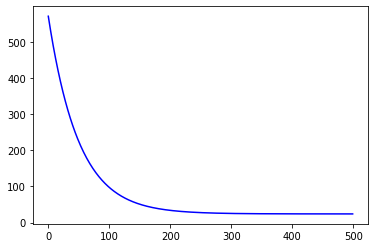

In [52]:
plt.plot(lc[:500], color='blue')
plt.show()

Finalmente, vamos fazer a função predict(pot,theta,md,dp) que retorna a predição do consumo para a potência

In [0]:
def predict(pot,theta,md,dp):
  pots = (pot - md) / dp
  return theta[0] + theta[1] * pots


Faça a predição para potência de 160HP

In [37]:
predict(160,theta,med,dp)

14.680703661367856

mostre a média de consumo para potência=160 no dataset

In [50]:
df[df['horsepower'] == 160]['mpg'].mean()

13.0